In [1]:
import rasterio
import numpy as np
import csv

# Load the raster file
raster_file = "C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_1\datasets\DiCRA\Telengana\SOCIO-ECONOMIC\CROPLAND\RASTER\\01-01-2022.tif"
output_csv = "C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code- review2\preprocessed_files\DICRA\\cropland.csv"

# Open the raster file
with rasterio.open(raster_file) as dataset:
    # Read the raster values
    raster_data = dataset.read(1)
    
    # Get the coordinates of each pixel
    transform = dataset.transform
    rows, cols = np.where(raster_data != dataset.nodata)  # Get indices where the value is not nodata

    # List to store results
    results = []

    for row, col in zip(rows, cols):
        # Get the pixel value (1 for cropland, 0 for non-cropland)
        value = raster_data[row, col]

        # Get the coordinates of the pixel
        x, y = rasterio.transform.xy(transform, row, col)

        # Store the coordinates and value
        results.append((x, y, value))

# Save results to CSV
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Longitude', 'Latitude', 'Cropland'])

    # Write data rows
    writer.writerows(results)

print(f"Data saved to {output_csv}")


Data saved to C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code- review2\preprocessed_files\DICRA\cropland.csv


In [3]:
%pip install matplotlib

     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
      --------------------------------------- 0.1/7.8 MB 4.3 MB/s eta 0:00:02
     - -------------------------------------- 0.3/7.8 MB 7.0 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.8 MB 5.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.9/7.8 MB 5.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/7.8 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.8 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.8 MB 5.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.8 MB 5.1 MB/s eta 0:00:02
     ---------- ----------------------------- 2.0/7.8 MB 5.0 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/7.8 MB 5.0 MB/s eta 0:00:02
     ------------ --------------------------- 2.5/7.8 MB 4.9 MB/s eta 0:00:02
     -------------- ------------------------- 2.8/7.8 MB 5.0 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\anves\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\anves\AppData\Local\Temp\ipykernel_26672\1316352488.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 2)  # 2 distinct colors


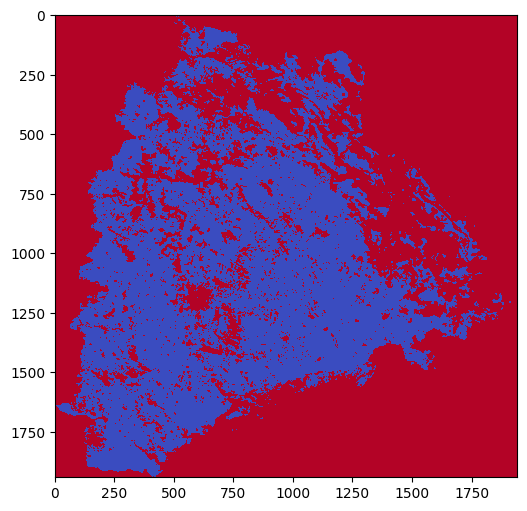

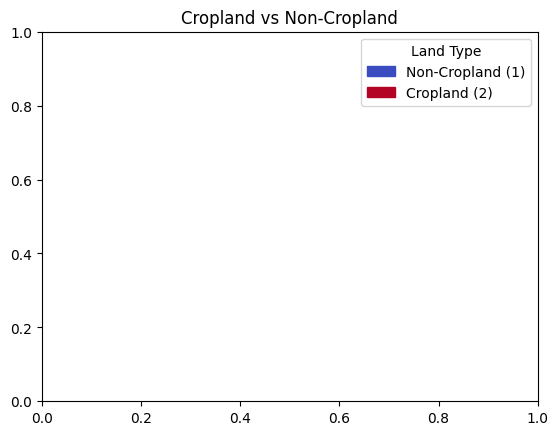

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import matplotlib.patches as mpatches

# Function to plot the raster file with distinct colors for cropland (2) and non-cropland (1)
def plot_cropland_raster(raster_file):
    # Open the raster file
    with rasterio.open(raster_file) as dataset:
        # Read the raster values (assuming a single band)
        raster_data = dataset.read(1)

    # Define colors for the plot (1 for non-cropland and 2 for cropland)
    cmap = plt.cm.get_cmap('coolwarm', 2)  # 2 distinct colors
    bounds = [1, 2, 3]  # Values corresponding to 1 (non-cropland) and 2 (cropland)
    norm = plt.Normalize(vmin=1, vmax=2)

    # Plot the raster
    plt.figure(figsize=(8, 6))
    show(raster_data, cmap=cmap, norm=norm)

    # Create custom legend
    non_crop_patch = mpatches.Patch(color=cmap(0), label="Non-Cropland (1)")
    crop_patch = mpatches.Patch(color=cmap(1), label="Cropland (2)")

    plt.legend(handles=[non_crop_patch, crop_patch], loc="upper right", title="Land Type")

    # Display the plot
    plt.title('Cropland vs Non-Cropland')
    plt.show()

# Example usage
raster_file = "C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_1\datasets\DiCRA\Telengana\SOCIO-ECONOMIC\CROPLAND\RASTER\\01-01-2022.tif"

plot_cropland_raster(raster_file)


C:\Users\anves\AppData\Local\Temp\ipykernel_26672\2911029111.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 3)  # 3 distinct colors for each value


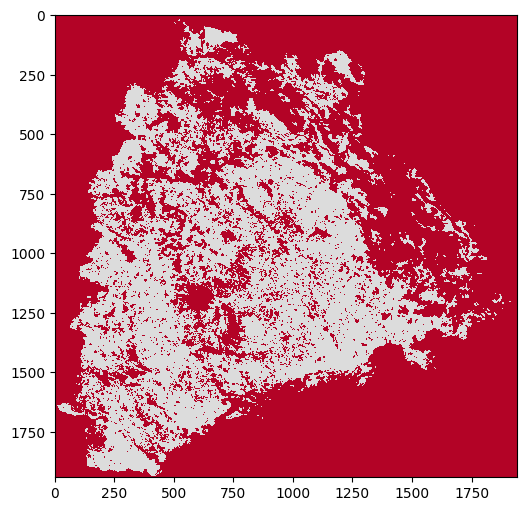

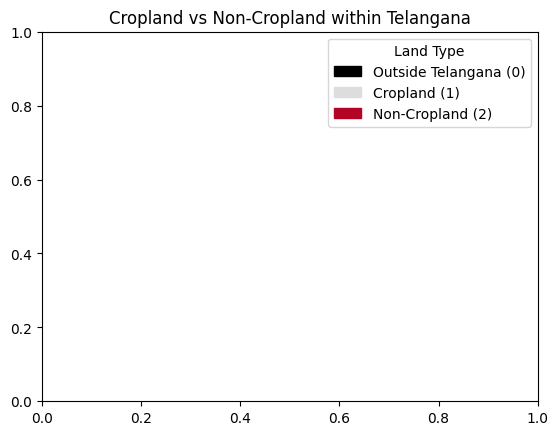

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import matplotlib.patches as mpatches

# Function to plot the raster with cropland, non-cropland, and outside areas
def plot_cropland_raster(raster_file):
    # Open the raster file
    with rasterio.open(raster_file) as dataset:
        # Read the raster values (assuming a single band)
        raster_data = dataset.read(1)

    # Define colors for the plot
    # 1 for cropland, 2 for non-cropland, 0 for outside area
    cmap = plt.cm.get_cmap('coolwarm', 3)  # 3 distinct colors for each value
    bounds = [0, 1, 2, 3]  # Values corresponding to 0 (outside), 1 (cropland), and 2 (non-cropland)
    norm = plt.Normalize(vmin=0, vmax=2)

    # Plot the raster
    plt.figure(figsize=(8, 6))
    show(raster_data, cmap=cmap, norm=norm)

    # Create custom legend
    outside_patch = mpatches.Patch(color='black', label="Outside Telangana (0)")
    crop_patch = mpatches.Patch(color=cmap(1), label="Cropland (1)")
    non_crop_patch = mpatches.Patch(color=cmap(2), label="Non-Cropland (2)")

    plt.legend(handles=[outside_patch, crop_patch, non_crop_patch], loc="upper right", title="Land Type")

    # Display the plot
    plt.title('Cropland vs Non-Cropland within Telangana')
    plt.show()

# Example usage
raster_file = "C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_1\datasets\DiCRA\Telengana\SOCIO-ECONOMIC\CROPLAND\RASTER\\01-01-2022.tif"

plot_cropland_raster(raster_file)


In [8]:
import rasterio
import numpy as np
import csv

# Load the raster file
raster_file = r"C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_1\datasets\DiCRA\Telengana\SOCIO-ECONOMIC\CROPLAND\RASTER\01-01-2022.tif"
output_csv = r"C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code- review2\preprocessed_files\DICRA\cropland2.csv"

# Open the raster file
with rasterio.open(raster_file) as dataset:
    # Read the raster values
    raster_data = dataset.read(1)
    
    # Get the coordinates of each pixel
    transform = dataset.transform
    rows, cols = np.where(raster_data != dataset.nodata)  # Get indices where the value is not nodata

    # List to store results
    results = []

    for row, col in zip(rows, cols):
        # Get the pixel value (1 for cropland, 2 for non-cropland, 0 for outside)
        value = raster_data[row, col]

        # Get the coordinates of the pixel
        x, y = rasterio.transform.xy(transform, row, col)

        # Convert the value to human-readable labels
        if value == 1:
            label = "Cropland"
        elif value == 2:
            label = "Non-Cropland"
        else:
            label = "Outside"

        # Store the coordinates and value (label)
        results.append((x, y, label))

# Save results to CSV
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Longitude', 'Latitude', 'Land Type'])

    # Write data rows
    writer.writerows(results)

print(f"Data saved to {output_csv}")


Data saved to C:\Anna_Data_D_files\sem6\z_capstone\Agriculture\A_Phase_2\code- review2\preprocessed_files\DICRA\cropland2.csv
